In [7]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
import pyaudio
p = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
RATE = 22050
CHUNK = 1024
CHANNELS = 1

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

RECORD_SECONDS = 5

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [27]:
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                output=True,
                frames_per_buffer=CHUNK)
for f in frames:
    stream.write(f)
stream.close()
p.terminate()

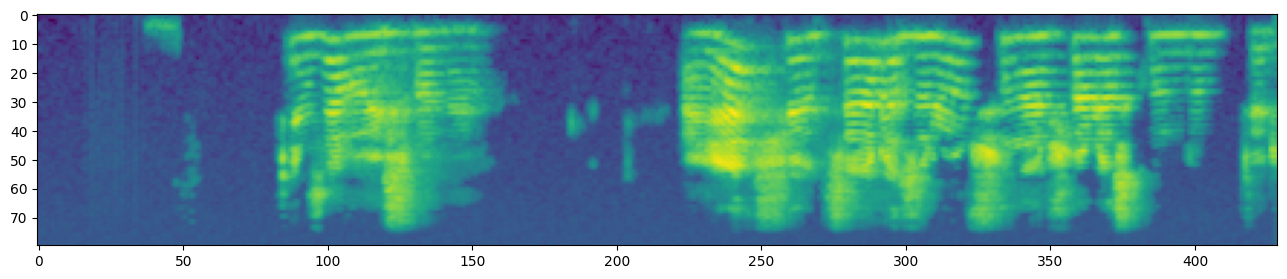

In [26]:
import numpy as np
waveform = np.frombuffer(b''.join(frames), np.int16)/32768
import torchaudio
import torch
transform = torchaudio.transforms.MelSpectrogram(22050, n_fft=1024, win_length=1024, 
                                                 hop_length=256, n_mels=80)
mel_specgram = transform(torch.tensor(waveform[None].astype(np.float32)))
figsize(16, 16)
imshow(np.log10(mel_specgram[0]))

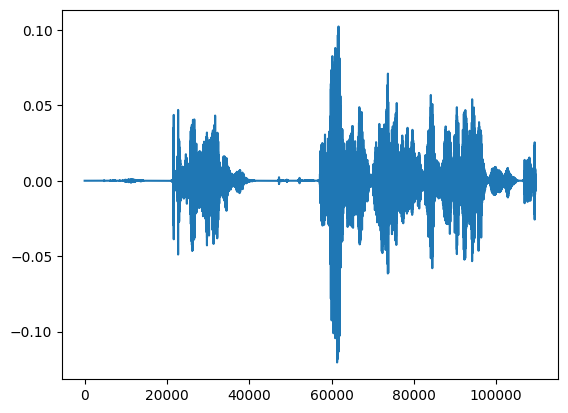

In [16]:
plot(waveform)

In [ ]:
from rec import Rec
model = Rec()
model.load_state_dict(torch.load('model/speech_2.pt'))

In [30]:
mel_specgram[0].T.shape

torch.Size([429, 80])

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'model' is not defined

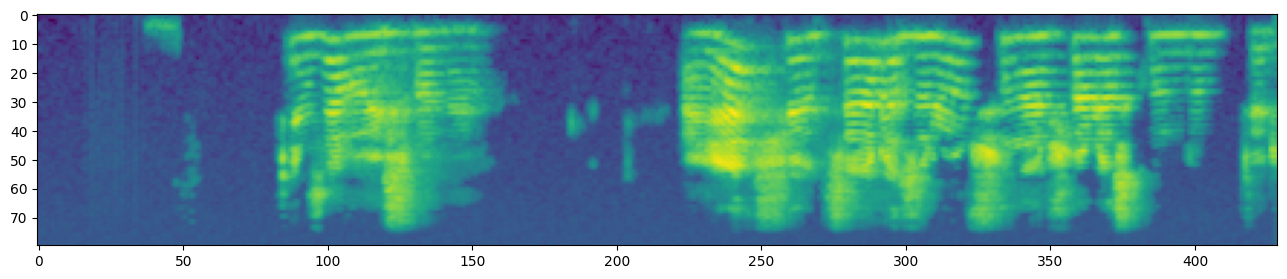

In [31]:
from rec import load_example, CHARSET
#val = torch.tensor(load_example('data/wavs/LJ037-0171.wav'))
val = mel_specgram[0].T
imshow(torch.log10(val).T)
mguess = model(val[:, None])
imshow(mguess.detach().numpy()[0])
pp = ''.join([CHARSET[c-1] for c in mguess[:, 0, :].argmax(dim=1) if c != 0])
print(pp)